In [1]:
#uploading relevant files
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [29]:
#import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load in dataset
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [30]:
#check for missing values
df.isnull().values.any()

False

In [40]:
df.shape

(92016, 5)

In [22]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'ElecPrice' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print(f' {k} : {v}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
 1% : -3.430421110703783
 5% : -2.8615714297867108
 10% : -2.56678672898094


In [77]:
adf_result = adfuller(df[ 'GasPrice' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print(f' {k} : {v}')

ADF Statistic: -6.793388065452672
p-value: 2.3337605343635883e-09
No. of lags used: 48
No. of observations used : 91967
Critical Values:
 1% : -3.430421106837576
 5% : -2.86157142807793
 10% : -2.566786728071412


In [78]:
adf_result = adfuller(df[ 'SysLoad' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print(f' {k} : {v}')

ADF Statistic: -18.170675426414437
p-value: 2.4474966090685618e-30
No. of lags used: 67
No. of observations used : 91948
Critical Values:
 1% : -3.430421121531399
 5% : -2.861571434572286
 10% : -2.566786731528145


Since the ADF statistics is less than the critical values we can assume the series is stationary


In [32]:
#Rename the Fulldate column to ds and the Elecprice to y
df1 = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df1[ 'FullDate' ]= pd.to_datetime(df1[ 'FullDate' ])
df1 = df1.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df1.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [60]:
#Split the dataset into train and test dataset
df_train1 = df1.loc[df1["ds"]<"2015-09-21"]
df_test1  = df1.loc[df1["ds"]>="2015-09-21"]

In [33]:
#implore the Prophet module to create model and fit the data
from prophet import Prophet
model = Prophet()
model.fit(df1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppdc510x9/wbnab7xs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdc510x9/h4v8xxjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8308', 'data', 'file=/tmp/tmppdc510x9/wbnab7xs.json', 'init=/tmp/tmppdc510x9/h4v8xxjp.json', 'output', 'file=/tmp/tmppdc510x9/prophet_modelqtc70f1a/prophet_model-20230726132933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


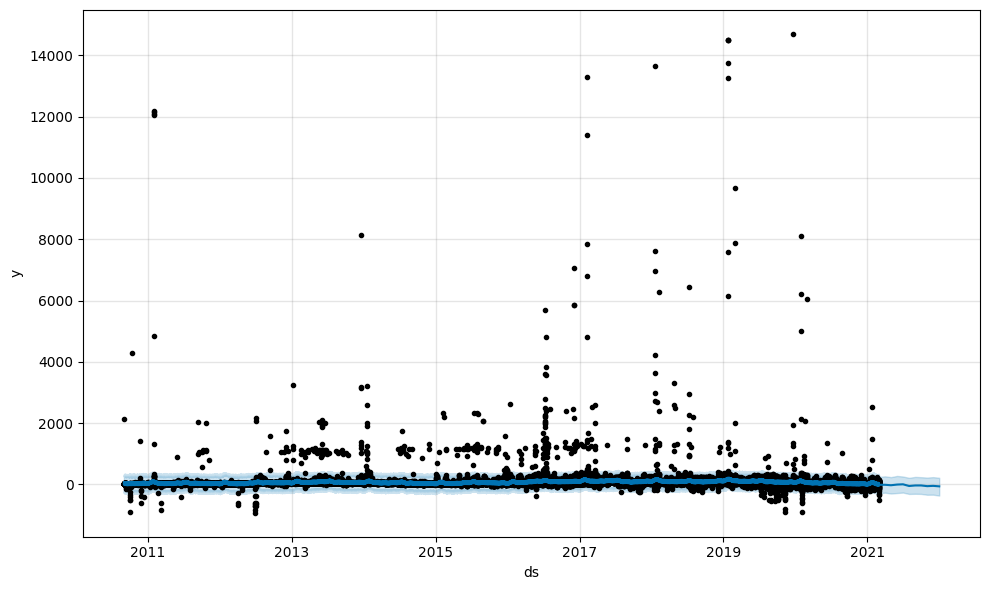

In [34]:
#predict for the next 10 months
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()

In [26]:
#display the forecasted result
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,31.505334,-234.740229,322.665368,31.505334,31.505334,-7.120183,-7.120183,-7.120183,-4.532363,...,-1.249770,-1.249770,-1.249770,-1.338049,-1.338049,-1.338049,0.0,0.0,0.0,24.385151
1,2010-09-01 01:00:00,31.506625,-228.282069,290.788636,31.506625,31.506625,-10.080747,-10.080747,-10.080747,-7.566565,...,-1.150443,-1.150443,-1.150443,-1.363739,-1.363739,-1.363739,0.0,0.0,0.0,21.425877
2,2010-09-01 02:00:00,31.507915,-252.742449,256.104042,31.507915,31.507915,-19.399058,-19.399058,-19.399058,-17.007400,...,-1.002024,-1.002024,-1.002024,-1.389635,-1.389635,-1.389635,0.0,0.0,0.0,12.108858
3,2010-09-01 03:00:00,31.509206,-259.799867,252.117911,31.509206,31.509206,-29.162562,-29.162562,-29.162562,-26.941854,...,-0.804974,-0.804974,-0.804974,-1.415734,-1.415734,-1.415734,0.0,0.0,0.0,2.346644
4,2010-09-01 04:00:00,31.510497,-260.229709,270.829896,31.510497,31.510497,-31.701604,-31.701604,-31.701604,-29.699380,...,-0.560188,-0.560188,-0.560188,-1.442036,-1.442036,-1.442036,0.0,0.0,0.0,-0.191107


Conducting the Multivariate Time series with Prophet

In [92]:
#Rename other variables
df2 = df1.rename(columns={ "Tmax" : "Add1" , "SysLoad" : "Add2", 'GasPrice': 'Add3' })
df2.head()

,ds,Add1,Add2,Add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [93]:
#Split the dataset into train and test data with train set being the first 2757 days and testset the last 2757 days
df_train = df2.loc[df2["ds"]<"2019-02-01"]
df_test  = df2.loc[df2["ds"]>="2019-02-01"]

In [73]:
#use the add_regressor function to add other variables to the model
m = Prophet()
m.add_regressor('Add1')
m.add_regressor('Add2')
m.add_regressor('Add3')
m.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppdc510x9/ll3sn5es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdc510x9/b6k04lo2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12773', 'data', 'file=/tmp/tmppdc510x9/ll3sn5es.json', 'init=/tmp/tmppdc510x9/b6k04lo2.json', 'output', 'file=/tmp/tmppdc510x9/prophet_model2wm66n3t/prophet_model-20230726145943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
forecast = m.predict(df_test.drop(columns="y"))

In [76]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Add1,Add1_lower,Add1_upper,Add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-01 00:00:00,92.007618,-162.381023,393.221743,92.007618,92.007618,0.031654,0.031654,0.031654,-68.461528,...,6.294239,6.294239,6.294239,33.809157,33.809157,33.809157,0.0,0.0,0.0,121.135131
1,2019-02-01 01:00:00,92.008958,-155.009907,391.735590,92.008958,92.008958,0.031654,0.031654,0.031654,-69.753637,...,5.819247,5.819247,5.819247,33.757481,33.757481,33.757481,0.0,0.0,0.0,119.424694
2,2019-02-01 02:00:00,92.010299,-155.485953,378.603305,92.010299,92.010299,0.031654,0.031654,0.031654,-79.129182,...,5.325485,5.325485,5.325485,33.705299,33.705299,33.705299,0.0,0.0,0.0,106.840750
3,2019-02-01 03:00:00,92.011639,-168.784348,361.651515,92.011639,92.011639,0.031654,0.031654,0.031654,-84.831686,...,4.816508,4.816508,4.816508,33.652610,33.652610,33.652610,0.0,0.0,0.0,99.496979
4,2019-02-01 04:00:00,92.012980,-181.934768,398.034602,92.012980,92.012980,0.031654,0.031654,0.031654,-85.367737,...,4.295851,4.295851,4.295851,33.599417,33.599417,33.599417,0.0,0.0,0.0,101.735713


In [89]:
y_actual= df1['y']
y_predicted= forecast['yhat']

In [90]:
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape
f=  MAPE(y_actual, y_predicted)
print(f)

380.8668139713994


In [94]:
forecast = m.predict(df_test.drop(columns="Add1"))

ValueError: ignored